## Import Data
a foundational step in working with data, allowing for analysis, modeling, preprocessing, and visualization necessary for various applications

Library imports : Importing the necessary Python libraries 
* pandas (`pd`): Used for data manipulation and analysis.
* numpy (`np`): Provides support for arrays and numerical operations.
* matplotlib.pyplot (`plt`): Enables plotting graphs and visualizations.
* seaborn (`sns`): Enhances the aesthetics of matplotlib plots and provides statistical visualization capabilities.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from an excel file and displaying the first few rows of the dataframe

In [27]:
dataset_path = 'ML Dataset - ECT report 66.xlsx'
df = pd.read_excel(dataset_path, sheet_name = 'Candidate_Constituency')
df.head()

,mp_app_id,mp_app_name,mp_app_no,mp_app_party_id,image_url
0,ACR_1_1,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...
1,ACR_1_10,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...
2,ACR_1_11,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...
3,ACR_1_12,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...
4,ACR_1_13,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...


## Data Cleansing
Checking for null values and printing sum and dropping columns

In [28]:
print(df.isnull().sum())
df.drop(['mp_app_id', 'mp_app_no', 'image_url'], axis = 'columns', inplace = True)

mp_app_id          0
mp_app_name        0
mp_app_no          0
mp_app_party_id    0
image_url          0
dtype: int64


## Preparing Data
prepare data to getting ready for analysis, modeling, and visualization

Scan a dataset, specifically the `'mp_app_name'` column in the DataFrame `df`, to identify prefixes that are not listed in the predefined set of known prefixes.

In [29]:
# known prefixes for reference
known_prefixes = ["นาย", "นาง", "นางสาว", "พันเอก (พิเศษ)", "พันเอก", "ว่าที่ร้อยตรี", "พลตำรวจตรี", "เรือเอก", "จ่าอากาศเอก", "พันตำรวจโท",
                  "พันจ่าอากาศเอก", "ร้อยตำรวจเอก", "พันโท", "พลตรี", "ร้อยตรี", "พันตรี", "พันตำรวจเอก", "พลอากาศโท", "ร้อยตำรวจตรี",
                  "ดาบตำรวจ", "นาวาอากาศเอก", "สิบตำรวจโท", "ร้อยโท", "ร้อยเอก", "รองศาสตราจารย์", "จ่าสิบเอก", "ว่าที่ร้อยเอก", "ร้อยตำรวจโท",
                  "หม่อมหลวง", "ว่าที่พันตรี", "นาวาเอก (พิเศษ)", "ว่าที่ร้อยโท", "สิบเอก", "พลเอก", "พลโท", "นาวาโท", "สิบตรี", "ว่าที่เรือเอก",
                  "พันตำรวจตรี หญิง", "พลตำรวจโท", "นาวาอากาศโท", "สิบตำรวจตรี", "พลอากาศตรี", "ผู้ช่วยศาสตราจารย์", "นาวาเอก",
                  "นาวาตรี", "จ่าเอก", "เรือโท", "เรืออากาศตรี", "จ่าอากาศตรี", "พันตำรวจตรี", "จ่าสิบตำรวจ", "จ่าสิบตรี", "เรือตรี"]

known_prefixes.sort()
unknown_prefixes = []

# iterate through names in the dataset
for name in df['mp_app_name']:
    if not any(name.startswith(prefix) for prefix in known_prefixes):
        unknown_prefixes.append(name)
print("Unknown prefixes:", set(unknown_prefixes))

Unknown prefixes: set()


Categorizes names in the dataframe based on whether they have a military/police prefix or not, and updates the dataframe with this information in a new column called `'is_military'`.

In [30]:
# list of civilian prefixes
normal_prefix = ['นาง', 'นางสาว', 'นาย', 'ผู้ช่วยศาสตราจารย์', 'รองศาสตราจารย์']

# add a column for the prefix type
df['is_military'] = ''

# iterate through the dataframe
for index, row in df.iterrows():
    if any(row['mp_app_name'].startswith(prefix) for prefix in normal_prefix):
        df.at[index, 'is_military'] = False
    else:
        df.at[index, 'is_military'] = True

Processes the original dataframe, calculates counts based on military/civilian prefixes for each party ID, and stores this information in another dataframe `df2`.

In [31]:
# create a final dataframe with columns: party_id, military_count, civilian_count
df2 = pd.DataFrame(columns=['party_id', 'military_count', 'civilian_count', 'total_count'])

# iterate through the dataframe
for index, row in df.iterrows():
    # check if the party_id is already in the final dataframe
    if row['mp_app_party_id'] not in df2['party_id'].values:
        # if not, create a new row
        new_row = pd.DataFrame({'party_id': [row['mp_app_party_id']], 'military_count': [0], 'civilian_count': [0], 'total_count': [0]})
        df2 = pd.concat([df2, new_row], ignore_index=True)
    # check if the name has a military/police prefix
    if row['is_military']:
        # if yes, increment the military_count
        df2.at[df2[df2['party_id'] == row['mp_app_party_id']].index[0], 'military_count'] += 1
    else:
        # if no, increment the civilian_count
        df2.at[df2[df2['party_id'] == row['mp_app_party_id']].index[0], 'civilian_count'] += 1
    # add 1 to the total_count
    df2.at[df2[df2['party_id'] == row['mp_app_party_id']].index[0], 'total_count'] += 1

# sort the dataframe by party_id and reset the index
df2 = df2.sort_values(by=['party_id']).reset_index(drop=True)
df2.head()

,party_id,military_count,civilian_count,total_count
0,701,17,383,400
1,702,4,28,32
2,703,0,5,5
3,705,12,388,400
4,706,10,95,105


Ensures that the entire dataframe `df2` is displayed without truncation and detects any missing or discontinuous party IDs in the 'party_id' column.

In [32]:
# print out the entire dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df2)

# detect discontinuity in the party_id column
for index, row in df2.iterrows():
    if index > 0:
        if row['party_id'] - df2.at[index - 1, 'party_id'] != 1:
            print("Discontinuity detected at index", index, "with party_id", row['party_id'] - 1)

   party_id military_count civilian_count total_count
0       701             17            383         400
1       702              4             28          32
2       703              0              5           5
3       705             12            388         400
4       706             10             95         105
5       707              1             49          50
6       708              1              6           7
7       709             16            371         387
8       710              0              5           5
9       711              0              1           1
10      712              5             35          40
11      713              0              2           2
12      714              1              8           9
13      715              0              1           1
14      717              0              2           2
15      718              0              3           3
16      719             62            338         400
17      720              0  

Remove Outlier

In [33]:
df2 = df2.drop(df2[df2['party_id'] == 719].index)

## Preprocessing Data 
a crucial step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis or model training. 

### Correlation
Prepares data, checks for missing values, and then creates a heatmap to help you understand how different columns in your dataset are related to each other.

########### type ########### 
party_id          object
military_count     int64
civilian_count     int64
total_count        int64
dtype: object
########### check empty ########### 
party_id          0
military_count    0
civilian_count    0
total_count       0
dtype: int64


C:\Users\msi1\AppData\Local\Temp\ipykernel_26504\3245747775.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


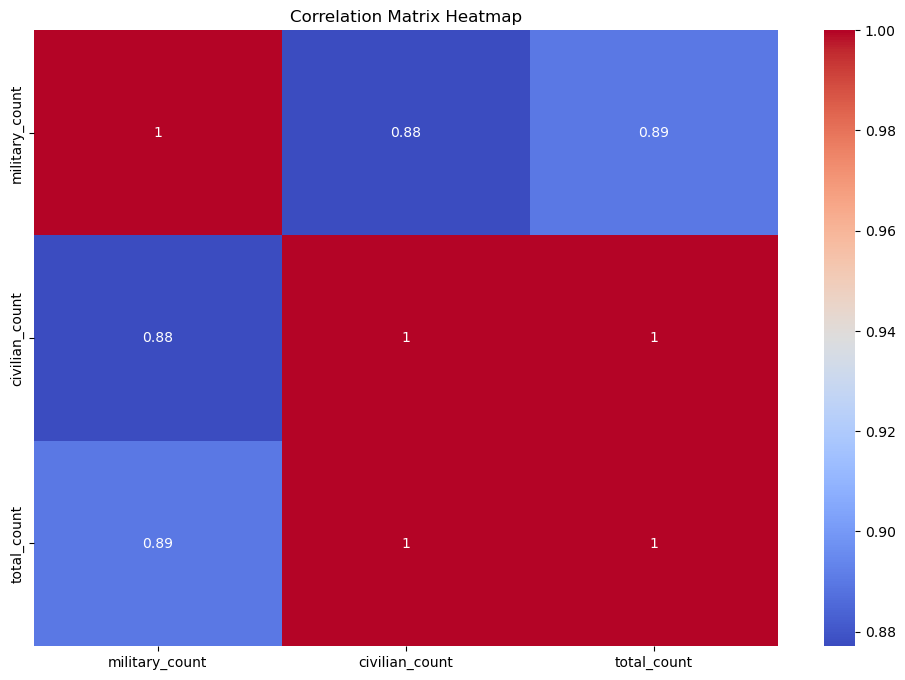

,party_id,military_count,civilian_count,total_count
0,701,17,383,400
1,702,4,28,32
2,703,0,5,5
3,705,12,388,400
4,706,10,95,105
...,...,...,...,...
65,780,0,5,5
66,781,0,5,5
67,783,0,3,3
68,784,0,2,2


In [34]:
# Convert the "military_count" column to numeric, coercing errors to NaN
df2["military_count"] = pd.to_numeric(df2["military_count"], errors="coerce")

# Convert the "civilian_count" column to numeric, coercing errors to NaN
df2["civilian_count"] = pd.to_numeric(df2["civilian_count"], errors="coerce")

# Convert the "total_count" column to numeric, coercing errors to NaN
df2["total_count"] = pd.to_numeric(df2["total_count"], errors="coerce")
print("########### type ########### ")
print(df2.dtypes)
print("########### check empty ########### ")
print(df2.isnull().sum()) # Check Empty

# Generate the correlation matrix
correlation_matrix = df2.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

df2

The resulting heatmap will show the correlations between the `"military_count"`, `"civilian_count"`, and `"total_count"` columns. 
* high positive correlations (close to 1.0) suggest a strong positive relationship
* high negative correlations (close to -1.0) suggest a strong negative relationship. 
* A correlation near 0 indicates little to no linear relationship between the variables. 

The heatmap reveals strong correlations, specifically between `"civilian_count"` and `"total_count"`.

### Skewed Behavior
uses seaborn to create a distribution plot (`displot`) for the `'total_count'` column from the DataFrame `df2`. Skewness analysis calculates and evaluates the skewness of the `'total_count'` data, providing insights into its distribution shape and asymmetry.

* If the skewness is between -0.5 and 0.5, the data is nearly symmetrical. 

* If the skewness is between -1 and -0.5 or between 0.5 and 1, the data is slightly skewed. 

* If the skewness is less than -1 or greater than 1, the data is extremely skewed.

skewness:  2.166881175769032


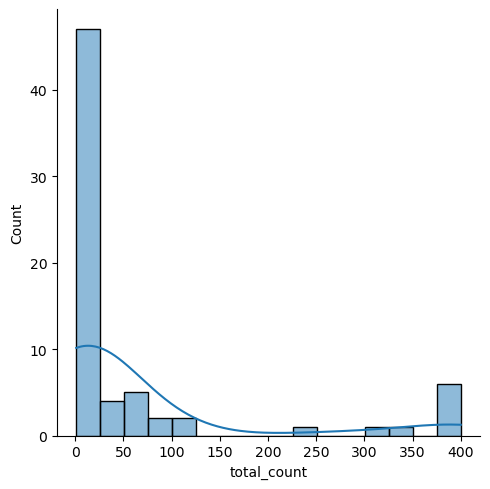

In [52]:
sns.displot(df2["total_count"], kde=True)
print("skewness: ",df2["total_count"].skew())

A graph of `"total_count"` on the right side and skewness is 2.166881175769032

uses seaborn to create a distribution plot (`displot`) for the `"military_count"` column from the DataFrame `df2`. Skewness analysis calculates and evaluates the skewness of the `"military_count"` data, providing insights into its distribution shape and asymmetry.

skewness:  2.1856290880873313


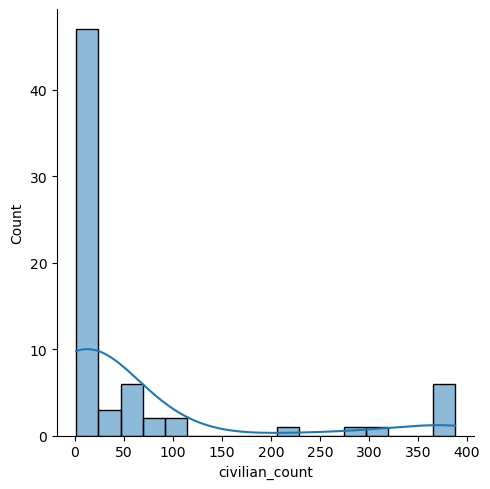

In [51]:
sns.displot(df2["civilian_count"], kde=True)
print("skewness: ",df2["civilian_count"].skew())

skewness:  2.462861026807488


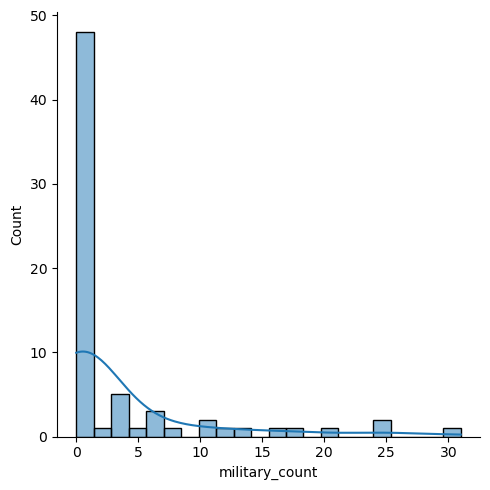

In [53]:
sns.displot(df2["military_count"], kde=True)
print("skewness: ",df2["military_count"].skew())

A graph of `"military_count"` on the right side and skewness is 2.462861026807488

As you can see, the results for `"total_count"` and `"military_count"` are not convergence to zero. Therefore, a transformation is performed to achieve a normal distribution.

### Transform Data
using the Box-Cox transformation, a non-linear function, to achieve a linear representation and mitigate non-linearity.

In terms of `"military_count"` there are instances where the count is zero, making it unsuitable for processing with the Box-Cox transformation. However, considering the correlation between `"military_count"` and `"civilian_count"` where `"total_count"` is the sum of `"military_count"` and `"civilian_count"` we opt to transform both `"total_count"` and `"civilian_count"`.

Using Box-Cox Transformation to the `"total_count"` column, aiming to stabilize variance and make the data more normally distributed. Calculates the skewness of the transformed data, providing insights into its distribution shape and asymmetry. The optimal lambda value for the Box-Cox transformation is printed, indicating the power transformation applied to achieve normality.

Skewness for Box-Cox transformed total_count: 0.1361851183257424
Optimal lambda value for Box-Cox transformation: -0.18576881439626824


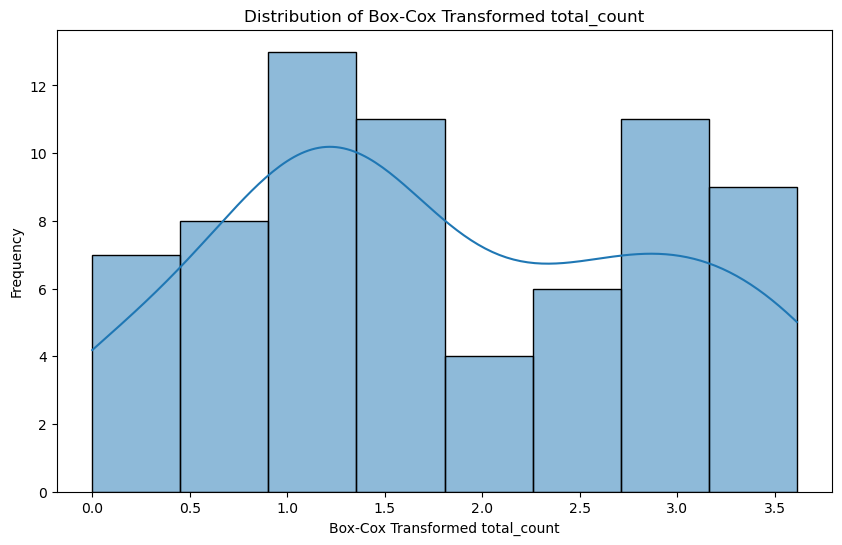

In [37]:
from scipy import stats

# Perform Box-Cox transformation on the "total_count" column
transformed_total_count, lambda_value = stats.boxcox(df2["total_count"])

# Calculate skewness for the transformed variable
skewness_total = stats.skew(transformed_total_count)

print('Skewness for Box-Cox transformed total_count:', skewness_total)
print('Optimal lambda value for Box-Cox transformation:', lambda_value)

# Create a distribution plot for the Box-Cox transformed variable
plt.figure(figsize=(10, 6))
sns.histplot(transformed_total_count, kde=True)
plt.title('Distribution of Box-Cox Transformed total_count')
plt.xlabel('Box-Cox Transformed total_count')
plt.ylabel('Frequency')
plt.show()

After transform data with box-cox a graph of `"total_count"` is in form of normal distribute and skewness is 0.1361851183257424 or convergence to zero

Using Box-Cox Transformation to the `"civilian_count"` column, aiming to stabilize variance and make the data more normally distributed. Calculates the skewness of the transformed data, providing insights into its distribution shape and asymmetry. The optimal lambda value for the Box-Cox transformation is printed, indicating the power transformation applied to achieve normality.

Skewness for Box-Cox transformed civilian_count: 0.1491719714830007
Optimal lambda value for Box-Cox transformation of civilian_count: -0.1995080355690581


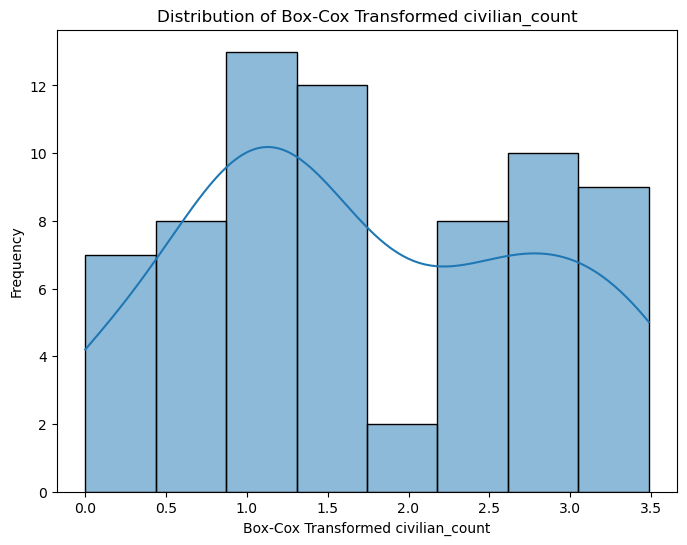

In [38]:
# Perform Box-Cox transformation on the "civilian_count" column
transformed_civilian_count, lambda_value_civilian = stats.boxcox(df2["civilian_count"])

# Calculate skewness for the Box-Cox transformed variable (civilian_count)
skewness_civilian = stats.skew(transformed_civilian_count)

print('Skewness for Box-Cox transformed civilian_count:', skewness_civilian)
print('Optimal lambda value for Box-Cox transformation of civilian_count:', lambda_value_civilian)

# Create a distribution plot for the Box-Cox transformed variable (civilian_count)
plt.figure(figsize=(8, 6))
sns.histplot(transformed_civilian_count, kde=True)
plt.title('Distribution of Box-Cox Transformed civilian_count')
plt.xlabel('Box-Cox Transformed civilian_count')
plt.ylabel('Frequency')
plt.show()

After transform data with box-cox a graph of `"civilian_count"` is in form of normal distribute and skewness is 0.1491719714830007 or convergence to zero

### Plot
Display a scatter plot illustrating the data both before and after the transformation to showcase the impact of the transformation on the data's distribution.

Creates a scatter plot to visualize the relationship between `"total_count"` and `"civilian_count"` from the DataFrame `df2`. (before the transformation)

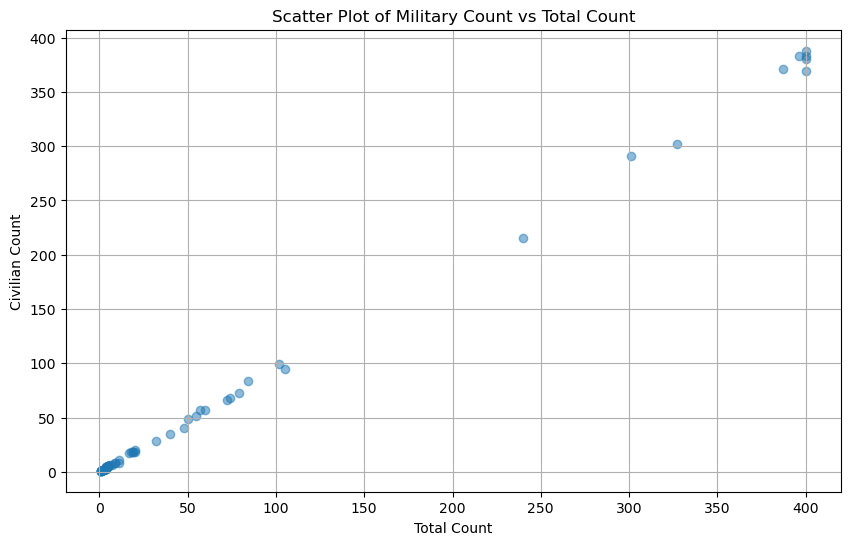

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df2["total_count"], df2["civilian_count"], alpha=0.5)  # Create the scatter plot
plt.title('Scatter Plot of Military Count vs Total Count')
plt.xlabel('Total Count')
plt.ylabel('Civilian Count')
plt.grid(True)

Creates a scatter plot to visualize the relationship between `transformed_total_count` and `transformed_civilian_count` from the DataFrame `df2`. (after the transformation)

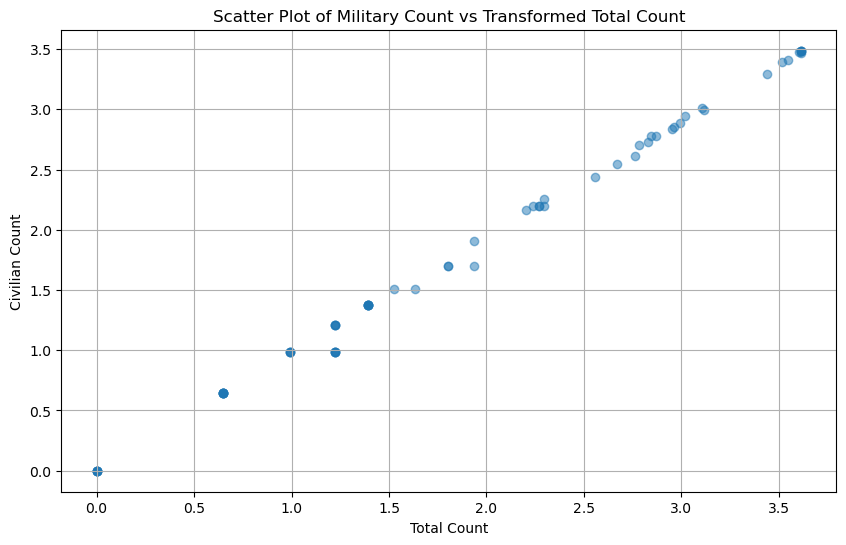

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(transformed_total_count, transformed_civilian_count, alpha=0.5)  # Create the scatter plot
plt.title("Scatter Plot of Military Count vs Transformed Total Count")
plt.xlabel("Total Count")
plt.ylabel("Civilian Count")
plt.grid(True)

## Create Model
designing and implementing a mathematical or computational representation that captures the underlying patterns, relationships, or behaviors present in the data.

Library imports : Importing the necessary Python libraries 
* sklearn.model_selection(`train_test_split`): splits a dataset into training and testing sets.
* sklearn.linear_model(`LinearRegression`): implements linear regression.
* scipy.special(`inv_boxcox`): performs the inverse Box-Cox transformation.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import inv_boxcox

In [42]:
# Applies Box-Cox transformation
transformed_total_count, lambda_total = stats.boxcox(df2["total_count"])
transformed_civilian_count, lambda_civilian = stats.boxcox(df2["civilian_count"])

df2["total_count_transformed"] = transformed_total_count
df2["civilian_count_transformed"] = transformed_civilian_count

# Splits the transformed data into training and testing sets.
train, test = train_test_split(df2, test_size=0.33, random_state=143438)

# Constructs a linear regression model predicting 
x_train = train[["total_count_transformed"]]
y_train = train["civilian_count_transformed"]
model = LinearRegression()
model.fit(x_train, y_train)

X_test = test[["total_count_transformed"]]
y_test = test["civilian_count_transformed"]

# Makes predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_train_original_scale = inv_boxcox(y_pred_train, lambda_civilian)
y_pred_test_original_scale = inv_boxcox(y_pred_test, lambda_civilian)

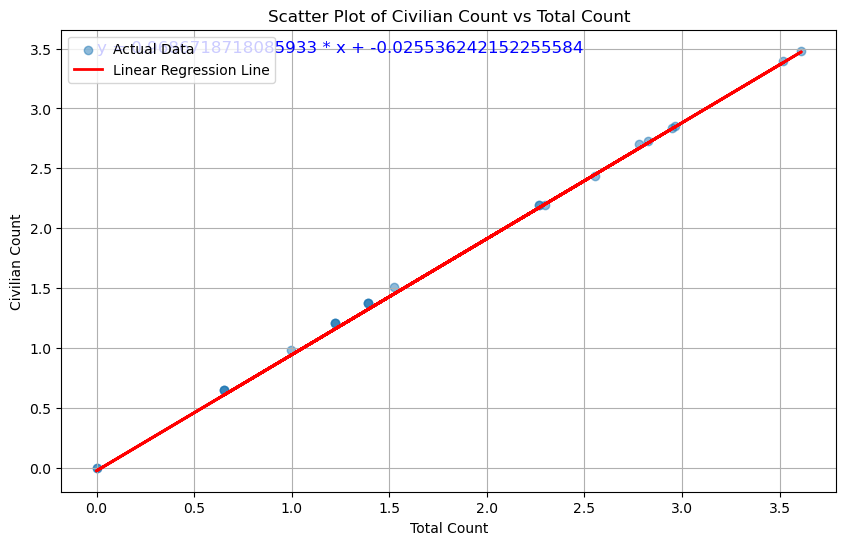

In [43]:
# Plots the actual data points (from the testing set) on the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual Data")
plt.title("Scatter Plot of Civilian Count vs Total Count")
plt.xlabel("Total Count")
plt.ylabel("Civilian Count")
plt.grid(True)

# Plots the linear regression line, which is the predicted values from the model.
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label="Linear Regression Line")
coefficients = model.coef_
intercept = model.intercept_
equation = f"y = {coefficients[0]} * x + {intercept}"
plt.text(X_test.min(), y_pred_test.max(), equation, fontsize=12, color='blue')
plt.legend()
plt.show()

The scatter plot of `"civilian_count"` against `"total_count"` demonstrates the scale of the transformed data.

Original scale

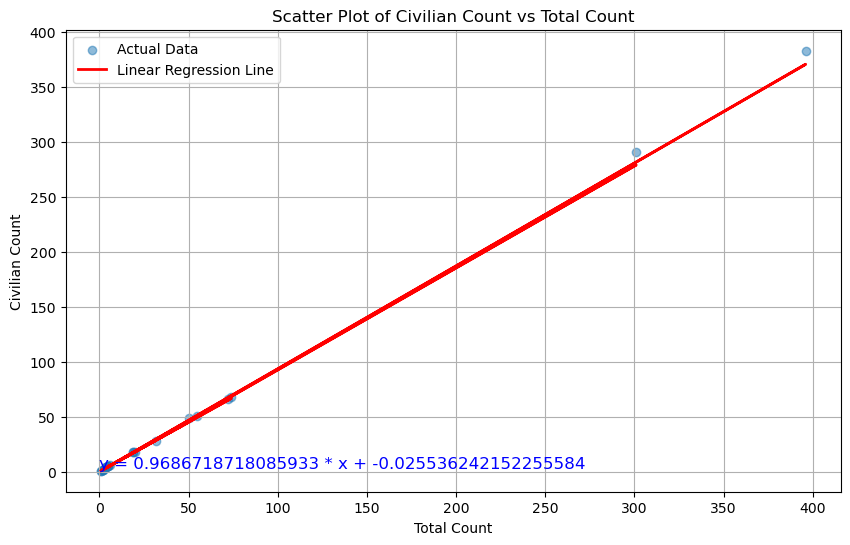

In [44]:
# Civilian vs Total (test)
plt.figure(figsize=(10, 6))
plt.scatter(inv_boxcox(X_test,lambda_total), inv_boxcox(y_test,lambda_civilian), alpha=0.5, label="Actual Data")
plt.title("Scatter Plot of Civilian Count vs Total Count")
plt.xlabel("Total Count")
plt.ylabel("Civilian Count")
plt.grid(True)

plt.plot(inv_boxcox(X_test,lambda_total), y_pred_test_original_scale, color='red', linewidth=2, label="Linear Regression Line")  # Regression line

coefficients = model.coef_
intercept = model.intercept_
equation = f"y = {coefficients[0]} * x + {intercept}"
plt.text(X_test.min(), y_pred_test.max(), equation, fontsize=12, color='blue')

plt.legend()
plt.show()

The scatter plot of `"civilian_count"` versus `"total_count"` illustrates the scale after inverse transformation to the real-world values.

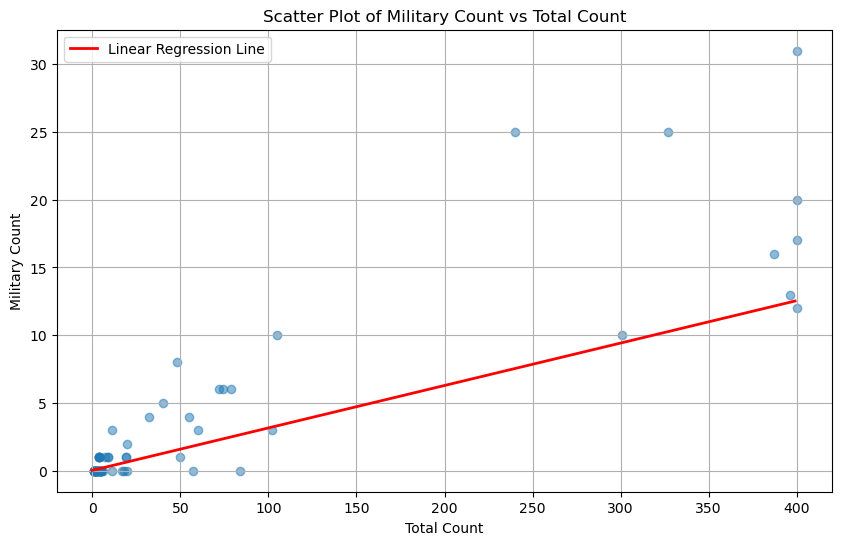

In [45]:
# Military vs Total
plt.figure(figsize=(10, 6))
plt.scatter(df2["total_count"], df2["military_count"], alpha=0.5)
plt.title("Scatter Plot of Military Count vs Total Count")
plt.xlabel("Total Count")
plt.ylabel("Military Count")
plt.grid(True)

# Military vs Total regression line based on civilian vs total (y = x - xm - intercept)
x = list(range(0, max(df2["total_count"])))
y = x.copy()
for i in range(0, len(x)):
    y[i] = x[i] - x[i]*coefficients[0] - intercept

plt.plot(x, y, color='red', linewidth=2, label="Linear Regression Line")

plt.legend()
plt.show()

The scatter plot of `"military_count"` versus `"total_count"` illustrates the scale after inverse transformation to the real-world values.

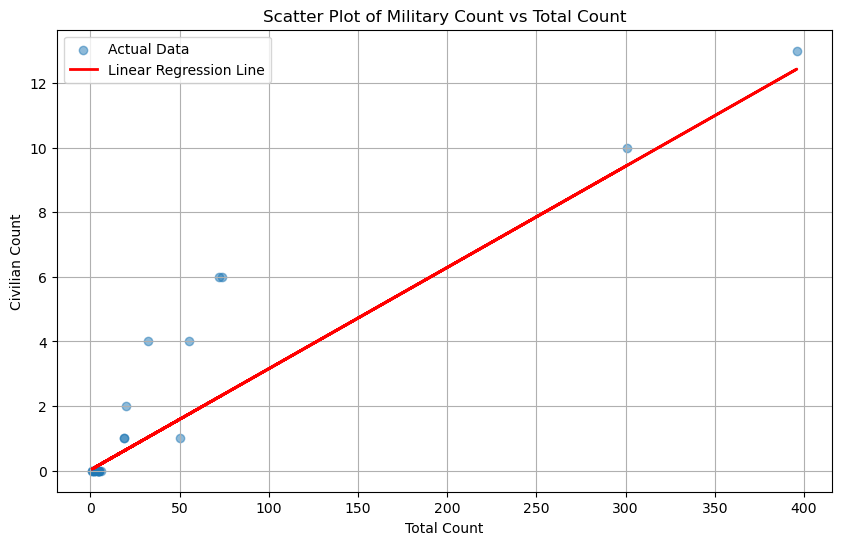

In [46]:
x = test["total_count"]
y = x.copy()

for index, row in test.iterrows():
    y[index] = x[index] - x[index]  * coefficients[0] - intercept

# Civilian vs Total (test)
plt.figure(figsize=(10, 6))
plt.scatter(test["total_count"], test["military_count"], alpha=0.5, label="Actual Data")
plt.title("Scatter Plot of Military Count vs Total Count")
plt.xlabel("Total Count")
plt.ylabel("Civilian Count")
plt.grid(True)

plt.plot(x, y, color='red', linewidth=2, label="Linear Regression Line")
plt.legend()
plt.show()

## Validate Model
ensure that the model generalizes well to unseen data and performs effectively in real-world scenarios.

Library imports : Importing the necessary Python libraries 
* sklearn.metrics(`mean_squared_error`): measures the average squared difference between the actual values and the predicted values by the model.
* sklearn.metrics(`r2_score`): measure of how well the predicted values from the model match the actual values.

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

root_mean_squared_error used for quantifies the overall quality of a regression model by providing a single numerical value to represent the magnitude of errors between predicted and actual values.

r2_score used for assesses the goodness of fit of a regression model, indicating how well the model explains the variability in the data.

In [50]:
# Calculates Mean Squared Error (MSE) and R-squared for both training and testing sets.
mse_test = sqrt(mean_squared_error(test["military_count"], y))
r2_test = r2_score(test["military_count"], y)
print(mse_test)
print(r2_test)

1.3898882478497
0.8412186821536412
